# 연습

1. csv폴더 안에 num_1 폴더에 있는 chipotle.tsv 로드
2. order_id컬럼의 데이터의 타입을 str 변경(이유는? 통계요약정보(describe() 숫자형의 데이터만 계산))
3. 가장 많이 주문한 item_name을 출력
4. item당 주문 총량의 top10을 바 그래프로 표시
5. item_price의 '$'를 제거하고 데이터의 타입을 float형태로 변경
6. 주문당 평균 계산 금액 출력

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
df=pd.read_csv("../csv/num_1/chipotle.tsv",sep='\t')
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [23]:
# describe를 썼을때 요약 방지 하기 위하여(성별,id등등-->astype(str))

df["order_id"]=df["order_id"].astype(str)
df["order_id"]

0          1
1          1
2          1
3          1
4          2
        ... 
4617    1833
4618    1833
4619    1834
4620    1834
4621    1834
Name: order_id, Length: 4622, dtype: object

In [24]:
# df.groupby('item_name).sum()[['quantity]].sort_value('quantity',ascending=Faslse)
# df.groupby('item_name).sum()['quantity].sort_value(ascending=Faslse)
# df['item_name,'quantity'].groupby('item_name).sum().sort_value(ascending=Faslse)

df2=df.groupby('item_name').sum()
df2=df2.sort_values("quantity",ascending=False)
df2

C:\Users\dgh06\AppData\Local\Temp\ipykernel_23628\3914331875.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2=df.groupby('item_name').sum()


,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351
Chips,230
Steak Bowl,221
Bottled Water,211
Chips and Fresh Tomato Salsa,130


In [25]:
df2.index[0]


'Chicken Bowl'

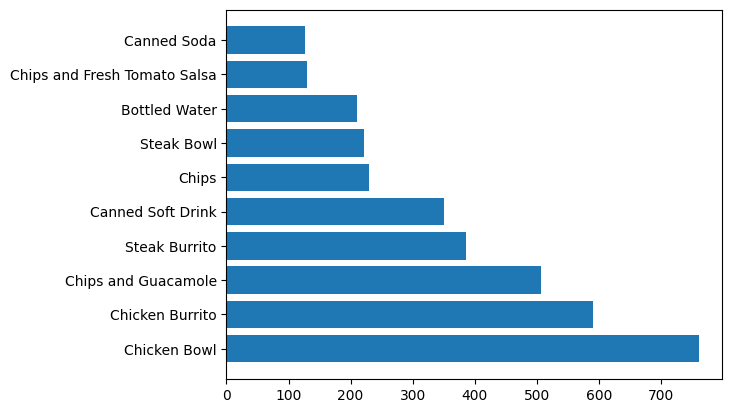

In [26]:
# case1--> df2.head(10).plot.bar()

# case2
# x=df2.head(10).index
# y=df2.head(10)['quantity']

x=df2.index[0:10]
y=df2['quantity'][0:10]

plt.barh(x,y)
plt.show()

In [27]:
# item_price의 '$'를 제거한다.

# case1
df['item_price']=df['item_price'].str.replace('$','')  # series의 형태이므로 df에서 사용가능한 replace가 안먹음
                                                       # series 중 문자열을 지운다

# case 2
# df['itema_price'].str.lstrip("$")                    # 좌측에 있는 '$'를 삭제하겠다!

# #case 3
# def change(x):
#     # x의 데이터의 타입 ---> 문자
#     x=x.replace("S","")
#     x=x.lstrip("$")
#     return x
# df['item_name'].apply(change)    # apply df['item_name]을 change 함수에 가져온다.--> 문자열을 가져옴

# case 4
# df['item_name'].apply(lambda y : y.replace("$",''))

df['item_price']=df['item_price'].astype(float)

C:\Users\dgh06\AppData\Local\Temp\ipykernel_23628\2591626938.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['item_price']=df['item_price'].str.replace('$','')  # series의 형태이므로 df에서 사용가능한 replace가 안먹음


In [34]:
N_D=df.groupby('order_id').sum()['item_price'].mean()
N_D


C:\Users\dgh06\AppData\Local\Temp\ipykernel_23628\2993396168.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  N_D=df.groupby('order_id').sum()['item_price'].mean()


18.811428571428568

In [35]:
# chicken bowl 이 매뉴를 2개 이상 주문한 고객들이 주문한 chicken bowl의 총 주문 수량

In [63]:
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [79]:
df.loc[(df["item_name"]=="Chicken Bowl") & (df["quantity"]>=2)]['quantity'].mean()



2.0606060606060606